## Project - Finding the Best Two Markets to Advertise In for an E-learning Product

The goal of this project is to find the best two markets to advertise the product of an e-learning company that offers courses on programming. To be more precise, we want to answer questions about a population of new coders that are interested in the subjects they teach (mostly web and mobile development). At the end of the analysis, we would like to know:

* Where are these new coders located.
* What locations have the greatest densities of new coders.
* How much money they're willing to spend on learning.

![Image](https://images.unsplash.com/photo-1593444285563-4479fb28226e?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1770&q=80)
_Photo by Markus Winkler on Unsplash_

### Understanding the Data

We'll use a dataset from freeCodeCamp (a free e-learning platform that offers courses on web development), which is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey). freeCodeCamp ran a survey that attracted new coders with diverse interests, which makes it fit for the purpose of our analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
survey=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 13/2017-fCC-New-Coders-Survey-Data.csv", low_memory=0)

In [3]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
survey.shape

(18175, 136)

### Checking for Sample Representativity

First we need to make sure the dataset has the right categories of people for our purpose. The `JobRoleInterest` column describes for every participant in the survey the roles they would be interested in working in. We assume that if a participant is interested in working in a certain domain, it means that they're also interested in learning about that domain. 

In [5]:
#frequency distribution table for the JobRoleInterest column
survey['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

The information in the table is granular and hard to analyze, but we can conclude that a lot of people are interested in web-development, a few people are intereseted in data science and mobile development and many of the respondents are interested in more than one subject.<br><br>
Next we want to find out how many people are interested in a single subject and how many have mixed interests. We will split the strings in the `JobRoleInterest` column and generate a frequency table for the variable describing the number of options.

In [6]:
interests_no_nulls = survey['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

In [7]:
number_of_options = splitted_interests.apply(lambda x: len(x))

In [8]:
number_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

We can conclude that just 31.7% of the participants have a clear idea about what they want to study and most of them have mixed interests. The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


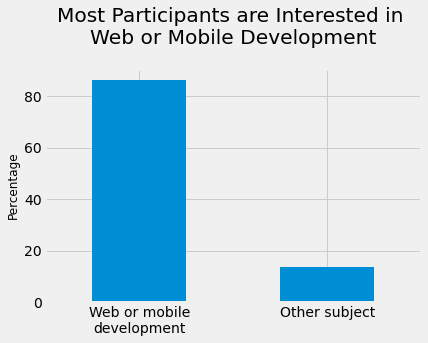

In [9]:
web_or_mobile = interests_no_nulls.str.contains(
    'Web Developer|Mobile Developer') 
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants are Interested in \nWeb or Mobile Development',
          y = 1.08) 
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subject'],
           rotation = 0)
plt.show()

It turns out that approximately 86% of the participants are interested in either web or mobile development. This makes us confident that the sample is representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

### New Coders - Locations and Densities

Now that we are confident that the sample is representative, we can start by examining the frequency distribution table of the `CountryLive` variable, which describes what country each participant lives in. We will isolate the participants that answered what role they'd be interested in to make sure we work with a representative sample.

In [10]:
fcc_good = survey[survey['JobRoleInterest'].notnull()].copy()

absolute_frequencies = fcc_good['CountryLive'].value_counts()
relative_frequencies = fcc_good['CountryLive'].value_counts(normalize = True) * 100


df=pd.DataFrame(data = {'Absolute frequency': absolute_frequencies, 
                     'Percentage': relative_frequencies}
            )
df

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Liberia,1,0.014624
Papua New Guinea,1,0.014624
Guadeloupe,1,0.014624
Gibraltar,1,0.014624


45.7% of our potential customers are located in the US, so this seems like the most profitable market. India has the second customer density (7.7%),followed by United Kingdom (4.6%) and Canada (3.8%). From now on, we will narrow down our analysis to only these 4 countries.

Nex, we will go more in depth to figure out how much money people are actually willing to spend on learning because we want to sell our products so advertising in markets where most people are only willing to learn for free is not profitable for us. 

### Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We will introduce a new column that describes the amount of money a student has spent per month so far. 

In [12]:
#  to avoid division by 0
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)
fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['money_per_month'].isnull().sum()

675

In [13]:
# we will keep only the rows that don't have null values for the money_per_month column
fcc_good = fcc_good[fcc_good['money_per_month'].notnull()]

We want to aggregate the data by country, and then measure the average amount of money that students spend per month in each country. 

In [14]:
# Remove the rows with null values in 'CountryLive'
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

In [15]:
# Mean sum of money spent by students each month
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for UK and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the UK and Canada, or we have some outliers. Or it might be that the results are correct.

### Dealing with Extreme Outliers

([<matplotlib.axis.XTick at 0x21fd9f36590>,
 [Text(0, 0, 'US'),
  Text(1, 0, 'UK'),
  Text(2, 0, 'India'),
  Text(3, 0, 'Canada')])

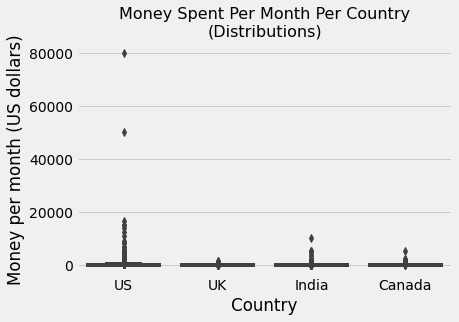

In [16]:
# Isolate only the countries of interest
only_4 = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 

It doesn't seem there is anything wrong with the data for the United Kingdom, India, or Canada, but we can see there's something off for the US: two persons spend each month 50000 or more for learning, which seems unlikely yo be true so we will fiter the data accordingly.

In [17]:
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

In [18]:
## Recompute mean sum of money spent by students each month
countries_mean = fcc_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                            'India', 'United Kingdom',
                            'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

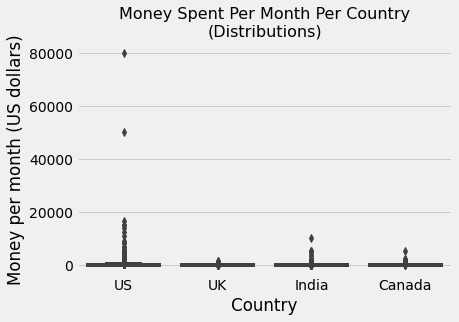

In [19]:
# Box plots to visualize distributions
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can still observe a few extreme outliers for India (values over $2500 per month), but it is unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. We will further examine these:

In [ ]:
# Inspect the outliers for India
india_outliers = only_4[
    (only_4['CountryLive'] == 'India') & 
    (only_4['money_per_month'] >= 2500)]
india_outliers

From the data above it seems that neither of these participants attended a bootcamp so we consider is safer to remove these rows.

In [ ]:
# Remove the outliers for India
only_4 = only_4.drop(india_outliers.index)

Next we will examine more the outliers for US.

In [20]:
us_outliers = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000)]

us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.000000


For the people that attended bootcamps, this justifies the large sums of money spent on learning. For the other five, we'll remove those rows where participants reported that they spend $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. It's probable they paid at once a large sum of money for a bootcamp, so the amount of money spent per month is unrealistic. In consequence, we'll remove these rows too.

In [ ]:
# Remove the respondents who didn't attendent a bootcamp and spend more than $6000/month
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months and spend more than $6000/month
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [23]:
# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['money_per_month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


We can see a similar situation for Canada: someone who had been programming for no more than two months when he completed the survey. We'll remove this outlier too since it's possible he paid a large sum of money in the beginning to enroll in a bootcamp, but it's not like he wil spend that much on a regular basis.

In [24]:
only_4 = only_4.drop(canada_outliers.index)

In [25]:
# Recompute mean sum of money spent by students each month after we removed the outliers
only_4.groupby('CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: money_per_month, dtype: float64

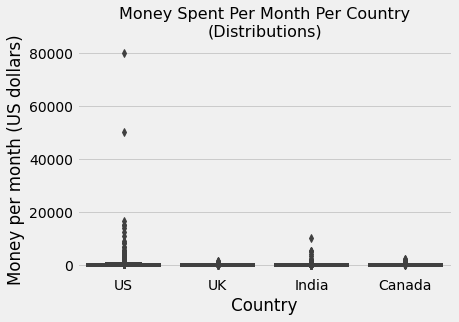

In [26]:

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

### Choosing the Two Best Markets

From what we analized so far we can conclude that one country we should advertise our products US because lots of new coders live there and they are willing to pay a good amount of money per month (roughly $143).

We sell subscriptions at a price of 59 usd/month and Canada seems to be the second best choice (93usd/month), followed by India (66) and UK(45).On the other hand we have almost twice as more potential customers in India than we have in Canada.


In [27]:
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.936127
India                       11.829331
United Kingdom               7.128258
Canada                       6.106285
Name: CountryLive, dtype: float64

The best choice might be to split the budget unequally in various combinations:
* 60% for the US, 25% for India, 15% for Canada.
* 50% for the US, 30% for Canada, 20% for India; etc.<br><br>
or if we want to choose only 2 markets:
* 70% for the US, and 30% for India/Canada etc. 